-- Penerapan PSO pada algoritma Decision Tree = pemilihan fitur yang terpilih dari pso diterapkan pada decision tree

*IMPORT LIBRARY*

In [5]:
#input libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyswarms as ps
import time as time

from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,  classification_report , precision_score, recall_score, f1_score

In [6]:
df = pd.read_csv('Kronis.csv')
df.head()

,Umur,Tekanan_Darah,Berat_Badan,Albumin,Gula,Sel_Darah_Merah,Sel_Nanah,Gumpalan_Sel_Nanah,Bacteri,Glukosa_Darah_Acak,...,Volume_Sel_yang_Dikemas,Jumlah_Sel_Darah_Putih,Jumlah_Sel_Darah_Merah,Hipertensi,Diabetes_Mellitus,Penyakit_Arteri_Koroner,Nafsu_Makan,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,26,56,34,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,19,70,34,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,23,68,27,0,3,1,0,0,0,0


*DATA UNDERSTANDING*


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Umur                     400 non-null    float64
 1   Tekanan_Darah            400 non-null    float64
 2   Berat_Badan              400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Gula                     400 non-null    float64
 5   Sel_Darah_Merah          400 non-null    int64  
 6   Sel_Nanah                400 non-null    int64  
 7   Gumpalan_Sel_Nanah       400 non-null    int64  
 8   Bacteri                  400 non-null    int64  
 9   Glukosa_Darah_Acak       400 non-null    float64
 10  Urea_Darah               400 non-null    float64
 11  Serum_Kreatinin          400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Kalium                   400 non-null    float64
 14  Haemoglobin              4

In [8]:
print('Data Shape :',df.shape)

Data Shape : (400, 25)


In [9]:
df.Class.value_counts()

Class
0    248
1    152
Name: count, dtype: int64

*CLEANING*


missing value, cek duplikat, transformasi data,split data


In [10]:
# Cek missing values
print("\nNilai Hilang di Setiap Kolom:")
print(df.isna().sum().sort_values(ascending = False))


Nilai Hilang di Setiap Kolom:
Umur                       0
Kalium                     0
Anemia                     0
Pedal_Edema                0
Nafsu_Makan                0
Penyakit_Arteri_Koroner    0
Diabetes_Mellitus          0
Hipertensi                 0
Jumlah_Sel_Darah_Merah     0
Jumlah_Sel_Darah_Putih     0
Volume_Sel_yang_Dikemas    0
Haemoglobin                0
Sodium                     0
Tekanan_Darah              0
Serum_Kreatinin            0
Urea_Darah                 0
Glukosa_Darah_Acak         0
Bacteri                    0
Gumpalan_Sel_Nanah         0
Sel_Nanah                  0
Sel_Darah_Merah            0
Gula                       0
Albumin                    0
Berat_Badan                0
Class                      0
dtype: int64


In [11]:
#misahkan fitur dan label, semua atribut kecuali label class 
ind_col = [col for col in df.columns if col != 'Class']
dep_col = 'Class'

pso

In [12]:
pip install pyswarm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


iterasi

In [13]:
import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Memisahkan fitur dan target
X = np.array(df.drop(['Class'], axis=1))  # Fitur x
y = np.array(df['Class'])  # Target

# Parameter BPSO
w = 0.9  # Bobot inersia
c1 = 1.0  # Koefisien kognitif
c2 = 1.2  # Koefisien sosial
n_particles = 25  # Jumlah partikel tetap

# Fungsi sigmoid untuk pembaruan kecepatan
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi untuk seleksi fitur dengan BPSO
def bpso_feature_selection(X, y, n_particles, n_iterations):
    np.random.seed(5)
    n_features = X.shape[1]
    
    # Inisialisasi partikel dan kecepatan
    particles = np.random.randint(0, 2, (n_particles, n_features))  # Binary (0/1)
    velocities = np.random.uniform(-1, 1, (n_particles, n_features))  # Kecepatan awal
    
    # Evaluasi awal
    fitness = np.array([evaluate_particle(X, y, particles[i]) for i in range(n_particles)])
    p_best = particles.copy()  # Posisi terbaik tiap partikel
    g_best = particles[np.argmax(fitness)]  # Posisi terbaik global
    
    # Iterasi BPSO
    for _ in range(n_iterations):
        for i in range(n_particles):
            # Update kecepatan
            r1, r2 = np.random.random(2)
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (p_best[i] - particles[i]) +
                             c2 * r2 * (g_best - particles[i]))
            # Update posisi
            particles[i] = np.where(np.random.random(n_features) < sigmoid(velocities[i]), 1, 0)
            
            # Evaluasi partikel
            current_fitness = evaluate_particle(X, y, particles[i])
            if current_fitness > fitness[i]:
                fitness[i] = current_fitness
                p_best[i] = particles[i]
        
        # Update g_best
        g_best = particles[np.argmax(fitness)]
    
    return g_best

# Fungsi untuk mengevaluasi partikel
def evaluate_particle(X, y, particle):
    # Jika semua fitur 0, berikan penalti
    if not particle.any():
        return 0
    selected_features = X[:, particle == 1]
    return np.mean(cross_val_accuracy(selected_features, y))

# Fungsi untuk menghitung rata-rata akurasi dengan 10-fold CV
def cross_val_accuracy(X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    accuracies = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = DecisionTreeClassifier(random_state=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies


iteration_results = []
time_results = []

# Menguji jumlah iterasi yang berbeda (5, 10, 15, ..., 50)
for n_iterations in range(5, 51, 5):  # Menguji 5, 10, 15, ..., 50 iterasi
    print(f"Testing for {n_iterations} iterations...")
    start_time = time.time()
    
    # Melakukan seleksi fitur dengan BPSO untuk jumlah iterasi yang berbeda dan jumlah partikel tetap 25
    selected_features = bpso_feature_selection(X, y, n_particles=n_particles, n_iterations=n_iterations)  # Jumlah partikel tetap 25
    selected_X = X[:, selected_features == 1]
    
    # Menghitung akurasi rata-rata dengan 10-fold cross-validation
    avg_accuracy = np.mean(cross_val_accuracy(selected_X, y))
    computation_time = time.time() - start_time
    
    # Menyimpan hasil
    iteration_results.append((n_iterations, avg_accuracy))
    time_results.append((n_iterations, computation_time))

# Menampilkan hasil
print("\nAccuracy Results:")
for n_iterations, acc in iteration_results:
    print(f"Iterations: {n_iterations}, Average Accuracy: {acc:.4f}")

print("\nComputation Time Results:")
for n_iterations, comp_time in time_results:
    print(f"Iterations: {n_iterations}, Computation Time: {comp_time:.2f} seconds")


Testing for 5 iterations...
Testing for 10 iterations...
Testing for 15 iterations...
Testing for 20 iterations...
Testing for 25 iterations...
Testing for 30 iterations...
Testing for 35 iterations...
Testing for 40 iterations...
Testing for 45 iterations...
Testing for 50 iterations...

Accuracy Results:
Iterations: 5, Average Accuracy: 0.9600
Iterations: 10, Average Accuracy: 0.9200
Iterations: 15, Average Accuracy: 0.9625
Iterations: 20, Average Accuracy: 0.9725
Iterations: 25, Average Accuracy: 0.9775
Iterations: 30, Average Accuracy: 0.8775
Iterations: 35, Average Accuracy: 0.9700
Iterations: 40, Average Accuracy: 0.9575
Iterations: 45, Average Accuracy: 0.9625
Iterations: 50, Average Accuracy: 0.9550

Computation Time Results:
Iterations: 5, Computation Time: 6.58 seconds
Iterations: 10, Computation Time: 10.17 seconds
Iterations: 15, Computation Time: 14.75 seconds
Iterations: 20, Computation Time: 19.74 seconds
Iterations: 25, Computation Time: 23.51 seconds
Iterations: 30, Co

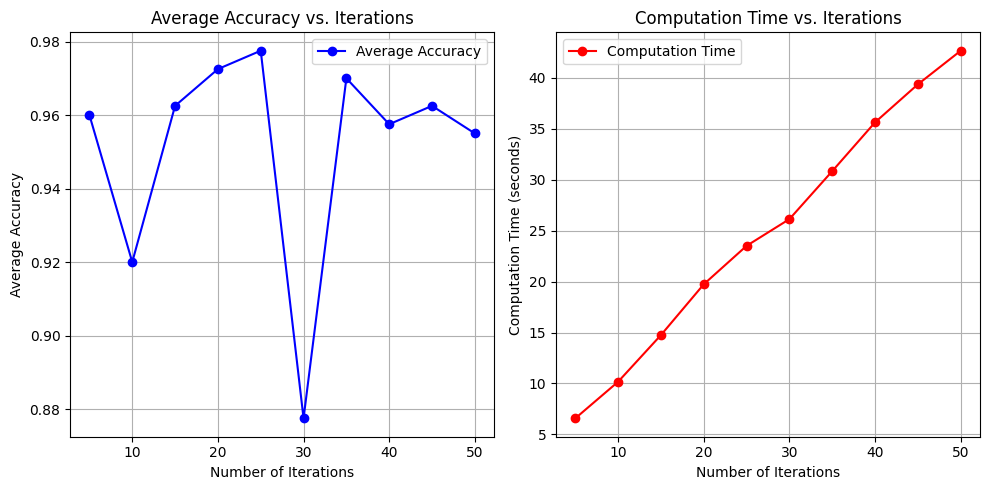

In [14]:
# Grafik untuk Akurasi
iterations = [n for n, _ in iteration_results]
accuracies = [acc for _, acc in iteration_results]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(iterations, accuracies, marker='o', color='b', label='Average Accuracy')
plt.title("Average Accuracy vs. Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.legend()

# Grafik untuk Waktu Komputasi
computation_times = [comp_time for _, comp_time in time_results]

plt.subplot(1, 2, 2)
plt.plot(iterations, computation_times, marker='o', color='r', label='Computation Time')
plt.title("Computation Time vs. Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Computation Time (seconds)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

partikel

In [15]:
import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Memisahkan fitur dan target
X = np.array(df.drop(['Class'], axis=1))  # Fitur x
y = np.array(df['Class'])  # Target

# Parameter BPSO
w = 0.9  # Bobot inersia
c1 = 1.0  # Koefisien kognitif
c2 = 1.2  # Koefisien sosial

# Fungsi sigmoid untuk pembaruan kecepatan
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi untuk seleksi fitur dengan BPSO
def bpso_feature_selection(X, y, n_particles, n_iterations):
    np.random.seed(5)
    n_features = X.shape[1]
    
    # Inisialisasi partikel dan kecepatan
    particles = np.random.randint(0, 2, (n_particles, n_features))  # Binary (0/1)
    velocities = np.random.uniform(-1, 1, (n_particles, n_features))  # Kecepatan awal
    
    # Evaluasi awal
    fitness = np.array([evaluate_particle(X, y, particles[i]) for i in range(n_particles)])
    p_best = particles.copy()  # Posisi terbaik tiap partikel
    g_best = particles[np.argmax(fitness)]  # Posisi terbaik global
    
    # Iterasi BPSO
    for _ in range(n_iterations):
        for i in range(n_particles):
            # Update kecepatan
            r1, r2 = np.random.random(2)
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (p_best[i] - particles[i]) +
                             c2 * r2 * (g_best - particles[i]))
            # Update posisi
            particles[i] = np.where(np.random.random(n_features) < sigmoid(velocities[i]), 1, 0)
            
            # Evaluasi partikel
            current_fitness = evaluate_particle(X, y, particles[i])
            if current_fitness > fitness[i]:
                fitness[i] = current_fitness
                p_best[i] = particles[i]
        
        # Update g_best
        g_best = particles[np.argmax(fitness)]
    
    return g_best

# Fungsi untuk mengevaluasi partikel
def evaluate_particle(X, y, particle):
    # Jika semua fitur 0, berikan penalti
    if not particle.any():
        return 0
    selected_features = X[:, particle == 1]
    return np.mean(cross_val_accuracy(selected_features, y))

# Fungsi untuk menghitung rata-rata akurasi dengan 10-fold CV
def cross_val_accuracy(X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    accuracies = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = DecisionTreeClassifier(random_state=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies


iteration_results = []
time_results = []

# Menguji jumlah partikel yang berbeda (5, 10, 15, ..., 50)
for n_particles in range(5, 55, 5):  # Menguji 5, 10, 15, ..., 50 partikel
    print(f"Testing for {n_particles} particles...")
    start_time = time.time()
    
    # Melakukan seleksi fitur dengan BPSO untuk jumlah partikel yang berbeda dan iterasi tetap 25
    selected_features = bpso_feature_selection(X, y, n_particles=n_particles, n_iterations=25)  # Jumlah iterasi tetap 40
    selected_X = X[:, selected_features == 1]
    
    # Menghitung akurasi rata-rata dengan 10-fold cross-validation
    avg_accuracy = np.mean(cross_val_accuracy(selected_X, y))
    computation_time = time.time() - start_time
    
    # Menyimpan hasil
    iteration_results.append((n_particles, avg_accuracy))
    time_results.append((n_particles, computation_time))

# Menampilkan hasil
print("\nAccuracy Results:")
for n_particles, acc in iteration_results:
    print(f"Particles: {n_particles}, Average Accuracy: {acc:.4f}")

print("\nComputation Time Results:")
for n_particles, comp_time in time_results:
    print(f"Particles: {n_particles}, Computation Time: {comp_time:.2f} seconds")


Testing for 5 particles...
Testing for 10 particles...
Testing for 15 particles...
Testing for 20 particles...
Testing for 25 particles...
Testing for 30 particles...
Testing for 35 particles...
Testing for 40 particles...
Testing for 45 particles...
Testing for 50 particles...

Accuracy Results:
Particles: 5, Average Accuracy: 0.9700
Particles: 10, Average Accuracy: 0.9425
Particles: 15, Average Accuracy: 0.9200
Particles: 20, Average Accuracy: 0.9450
Particles: 25, Average Accuracy: 0.9775
Particles: 30, Average Accuracy: 0.9525
Particles: 35, Average Accuracy: 0.9825
Particles: 40, Average Accuracy: 0.9375
Particles: 45, Average Accuracy: 0.9625
Particles: 50, Average Accuracy: 0.9575

Computation Time Results:
Particles: 5, Computation Time: 4.56 seconds
Particles: 10, Computation Time: 8.43 seconds
Particles: 15, Computation Time: 13.08 seconds
Particles: 20, Computation Time: 16.63 seconds
Particles: 25, Computation Time: 21.19 seconds
Particles: 30, Computation Time: 24.92 secon

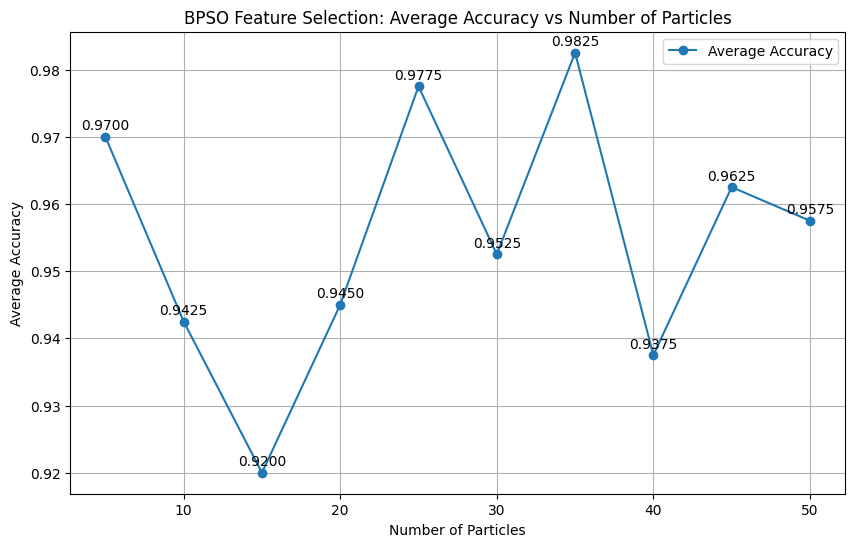

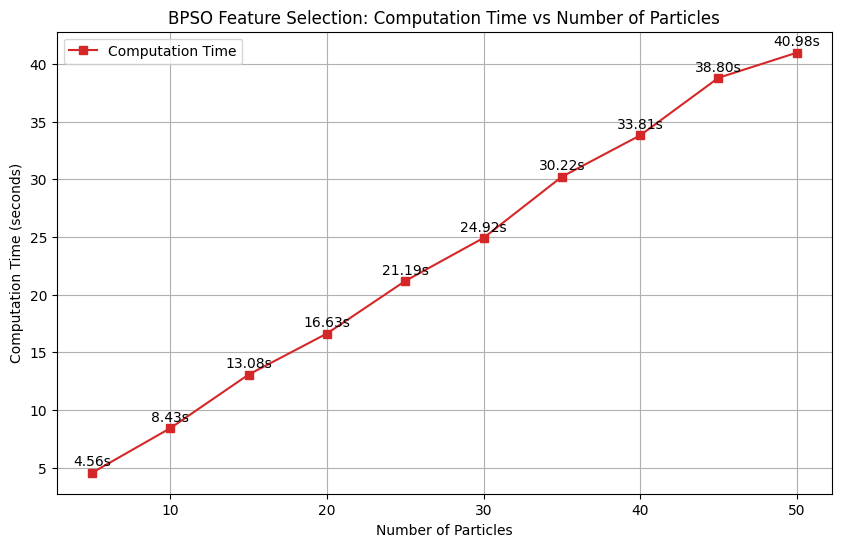

In [16]:
import matplotlib.pyplot as plt

# Extracting data for plotting
particle_counts = [n_particles for n_particles, _ in iteration_results]
accuracies = [acc for _, acc in iteration_results]
computation_times = [comp_time for _, comp_time in time_results]

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(particle_counts, accuracies, color='tab:blue', marker='o', label='Average Accuracy')
plt.xlabel('Number of Particles')
plt.ylabel('Average Accuracy')
plt.title('BPSO Feature Selection: Average Accuracy vs Number of Particles')
plt.grid(True)
plt.legend()

# Annotating each point with its accuracy value
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.4f}', (particle_counts[i], accuracies[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

# Plotting Computation Time
plt.figure(figsize=(10, 6))
plt.plot(particle_counts, computation_times, color='tab:red', marker='s', label='Computation Time')
plt.xlabel('Number of Particles')
plt.ylabel('Computation Time (seconds)')
plt.title('BPSO Feature Selection: Computation Time vs Number of Particles')
plt.grid(True)
plt.legend()

# Annotating each point with its computation time value
for i, comp_time in enumerate(computation_times):
    plt.annotate(f'{comp_time:.2f}s', (particle_counts[i], computation_times[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

bobot inersia

Testing for inertia weight: 0.1...
Testing for inertia weight: 0.2...
Testing for inertia weight: 0.30000000000000004...
Testing for inertia weight: 0.4...
Testing for inertia weight: 0.5...
Testing for inertia weight: 0.6...
Testing for inertia weight: 0.7000000000000001...
Testing for inertia weight: 0.8...
Testing for inertia weight: 0.9...
Testing for inertia weight: 1.0...

Accuracy Results:
Inertia Weight: 0.1, Average Accuracy: 0.9100
Inertia Weight: 0.2, Average Accuracy: 0.9650
Inertia Weight: 0.30000000000000004, Average Accuracy: 0.9100
Inertia Weight: 0.4, Average Accuracy: 0.9000
Inertia Weight: 0.5, Average Accuracy: 0.9150
Inertia Weight: 0.6, Average Accuracy: 0.9800
Inertia Weight: 0.7000000000000001, Average Accuracy: 0.9825
Inertia Weight: 0.8, Average Accuracy: 0.9675
Inertia Weight: 0.9, Average Accuracy: 0.9825
Inertia Weight: 1.0, Average Accuracy: 0.9450

Computation Time Results:
Inertia Weight: 0.1, Computation Time: 30.10 seconds
Inertia Weight: 0.2, Computat

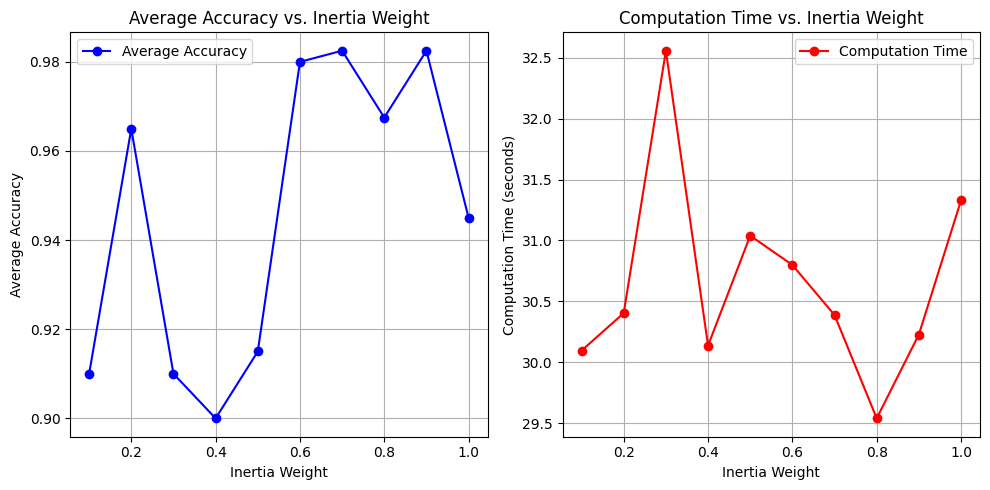

In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Memisahkan fitur dan target
X = np.array(df.drop(['Class'], axis=1))  # Fitur x
y = np.array(df['Class'])  # Target

# Parameter BPSO
c1 = 1.0  # Koefisien kognitif
c2 = 1.2  # Koefisien sosial
n_particles = 35  # Jumlah partikel tetap
n_iterations = 25  # Jumlah iterasi tetap

# Fungsi sigmoid untuk pembaruan kecepatan
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi untuk seleksi fitur dengan BPSO
def bpso_feature_selection(X, y, n_particles, n_iterations, w):
    np.random.seed(5)
    n_features = X.shape[1]
    
    # Inisialisasi partikel dan kecepatan
    particles = np.random.randint(0, 2, (n_particles, n_features))  # Binary (0/1)
    velocities = np.random.uniform(-1, 1, (n_particles, n_features))  # Kecepatan awal
    
    # Evaluasi awal
    fitness = np.array([evaluate_particle(X, y, particles[i]) for i in range(n_particles)])
    p_best = particles.copy()  # Posisi terbaik tiap partikel
    g_best = particles[np.argmax(fitness)]  # Posisi terbaik global
    
    # Iterasi BPSO
    for _ in range(n_iterations):
        for i in range(n_particles):
            # Update kecepatan
            r1, r2 = np.random.random(2)
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (p_best[i] - particles[i]) +
                             c2 * r2 * (g_best - particles[i]))
            # Update posisi
            particles[i] = np.where(np.random.random(n_features) < sigmoid(velocities[i]), 1, 0)
            
            # Evaluasi partikel
            current_fitness = evaluate_particle(X, y, particles[i])
            if current_fitness > fitness[i]:
                fitness[i] = current_fitness
                p_best[i] = particles[i]
        
        # Update g_best
        g_best = particles[np.argmax(fitness)]
    
    return g_best

# Fungsi untuk mengevaluasi partikel
def evaluate_particle(X, y, particle):
    # Jika semua fitur 0, berikan penalti
    if not particle.any():
        return 0
    selected_features = X[:, particle == 1]
    return np.mean(cross_val_accuracy(selected_features, y))

# Fungsi untuk menghitung rata-rata akurasi dengan 10-fold CV
def cross_val_accuracy(X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    accuracies = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = DecisionTreeClassifier(random_state=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies


# Menguji bobot inersia yang berbeda (0.1, 0.2, ..., 1.0)
w_values = np.arange(0.1, 1.1, 0.1)  # Bobot inersia dari 0.1 sampai 1.0
iteration_results = []
time_results = []

for w in w_values:
    print(f"Testing for inertia weight: {w}...")
    start_time = time.time()
    
    # Melakukan seleksi fitur dengan BPSO untuk bobot inersia yang berbeda
    selected_features = bpso_feature_selection(X, y, n_particles=n_particles, n_iterations=n_iterations, w=w)
    selected_X = X[:, selected_features == 1]
    
    # Menghitung akurasi rata-rata dengan 10-fold cross-validation
    avg_accuracy = np.mean(cross_val_accuracy(selected_X, y))
    computation_time = time.time() - start_time
    
    # Menyimpan hasil
    iteration_results.append((w, avg_accuracy))
    time_results.append((w, computation_time))

# Menampilkan hasil
print("\nAccuracy Results:")
for w, acc in iteration_results:
    print(f"Inertia Weight: {w}, Average Accuracy: {acc:.4f}")

print("\nComputation Time Results:")
for w, comp_time in time_results:
    print(f"Inertia Weight: {w}, Computation Time: {comp_time:.2f} seconds")

# Grafik untuk Akurasi
inertia_weights = [w for w, _ in iteration_results]
accuracies = [acc for _, acc in iteration_results]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(inertia_weights, accuracies, marker='o', color='b', label='Average Accuracy')
plt.title("Average Accuracy vs. Inertia Weight")
plt.xlabel("Inertia Weight")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.legend()

# Grafik untuk Waktu Komputasi
computation_times = [comp_time for _, comp_time in time_results]

plt.subplot(1, 2, 2)
plt.plot(inertia_weights, computation_times, marker='o', color='r', label='Computation Time')
plt.title("Computation Time vs. Inertia Weight")
plt.xlabel("Inertia Weight")
plt.ylabel("Computation Time (seconds)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Pengujian Koefisien Akselerasi 

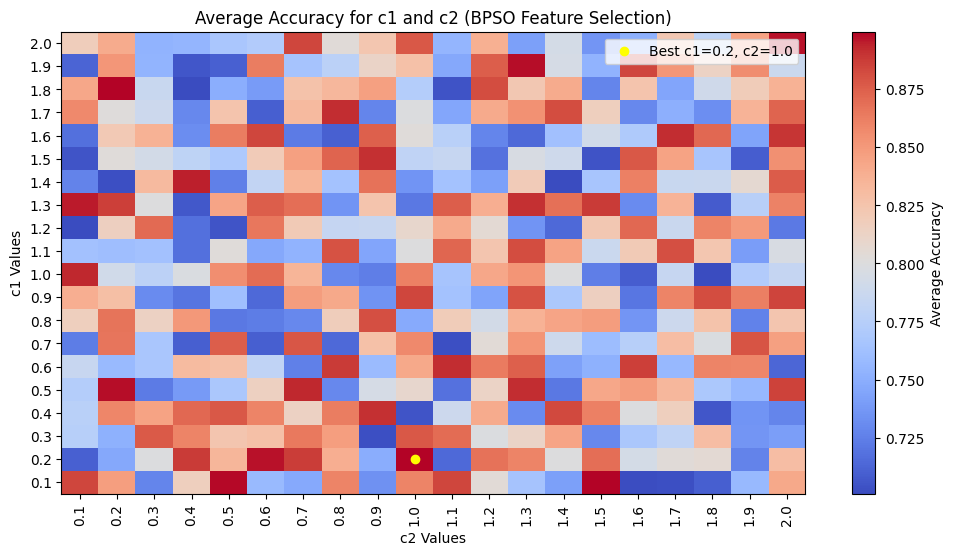

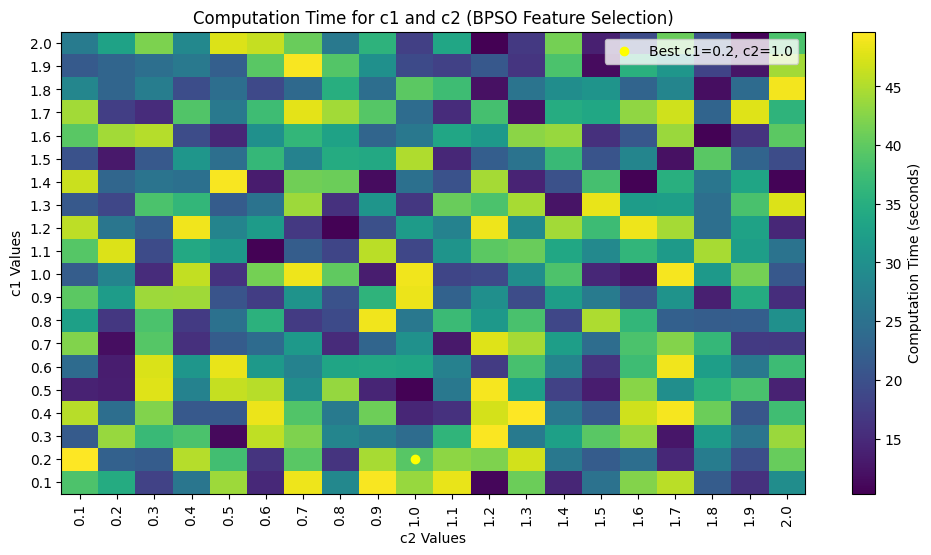

Nilai c1 terbaik: 0.2
Nilai c2 terbaik: 1.0
Akurasi terbaik: 0.8998
Waktu komputasi untuk kombinasi terbaik: 39.50 detik


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Simulasi hasil eksperimen (data dummy untuk demonstrasi)
c1_values = np.arange(0.1, 2.1, 0.1)  # Nilai c1
c2_values = np.arange(0.1, 2.1, 0.1)  # Nilai c2
num_c1 = len(c1_values)
num_c2 = len(c2_values)

# Data dummy untuk rata-rata akurasi (10-fold CV) dan waktu komputasi
accuracies = np.random.uniform(0.7, 0.9, num_c1 * num_c2).reshape(num_c1, num_c2)
computation_times = np.random.uniform(10, 50, num_c1 * num_c2).reshape(num_c1, num_c2)

# Memilih nilai c1 dan c2 dengan akurasi terbaik
max_accuracy_idx = np.unravel_index(np.argmax(accuracies, axis=None), accuracies.shape)
best_c1 = c1_values[max_accuracy_idx[0]]
best_c2 = c2_values[max_accuracy_idx[1]]
best_accuracy = accuracies[max_accuracy_idx]
best_computation_time = computation_times[max_accuracy_idx]

# Plot Akurasi vs Kombinasi c1 dan c2
plt.figure(figsize=(12, 6))
plt.imshow(accuracies, interpolation='nearest', cmap='coolwarm', origin='lower', aspect='auto')
plt.colorbar(label='Average Accuracy')
plt.title("Average Accuracy for c1 and c2 (BPSO Feature Selection)")
plt.xlabel("c2 Values")
plt.ylabel("c1 Values")
plt.xticks(np.arange(num_c2), labels=[f"{c:.1f}" for c in c2_values], rotation=90)
plt.yticks(np.arange(num_c1), labels=[f"{c:.1f}" for c in c1_values])

# Menandai nilai terbaik
plt.scatter(max_accuracy_idx[1], max_accuracy_idx[0], color='yellow', label=f"Best c1={best_c1:.1f}, c2={best_c2:.1f}")
plt.legend()
plt.show()

# Plot Waktu Komputasi vs Kombinasi c1 dan c2
plt.figure(figsize=(12, 6))
plt.imshow(computation_times, interpolation='nearest', cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Computation Time (seconds)')
plt.title("Computation Time for c1 and c2 (BPSO Feature Selection)")
plt.xlabel("c2 Values")
plt.ylabel("c1 Values")
plt.xticks(np.arange(num_c2), labels=[f"{c:.1f}" for c in c2_values], rotation=90)
plt.yticks(np.arange(num_c1), labels=[f"{c:.1f}" for c in c1_values])

# Menandai nilai terbaik
plt.scatter(max_accuracy_idx[1], max_accuracy_idx[0], color='yellow', label=f"Best c1={best_c1:.1f}, c2={best_c2:.1f}")
plt.legend()
plt.show()

# Output hasil terbaik
print(f"Nilai c1 terbaik: {best_c1}")
print(f"Nilai c2 terbaik: {best_c2}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")
print(f"Waktu komputasi untuk kombinasi terbaik: {best_computation_time:.2f} detik")


pemilihan fitur

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import pyswarms as ps
import pandas as pd

# Memisahkan fitur dan target
X = np.array(df.drop(['Class'], axis=1))  # Fitur x
y = np.array(df['Class'])  # Target

# Menetapkan seed random state untuk memastikan konsistensi
np.random.seed(5)

# Parameter PSO
options = {'c1': 0.2, 'c2': 1.0, 'w': 0.9, 'k': 35, 'p': 25}
max_bound = 1.0 * np.ones(X.shape[1])
min_bound = 0.0 * np.ones(X.shape[1])
bounds = (min_bound, max_bound)

# Fungsi objektif
def f_per_particle(m):
    # Memilih subset fitur
    X_subset = X[:, m > 0.5]  
    if X_subset.shape[1] == 0:
        return float('inf')

    # Pembagian data menjadi training dan testing 
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=5, shuffle=True)

    # Membuat model Decision Tree
    dtc = DecisionTreeClassifier(random_state=5)
    dtc.fit(X_train, y_train)

    # Melakukan prediksi dengan data uji
    dtc_predictions = dtc.predict(X_test)  # Menggunakan X_test untuk prediksi
    accuracy = accuracy_score(y_test, dtc_predictions)  
    return 1 - accuracy  # Minimize objective function

# Fungsi objektif untuk seluruh swarm
def f(x):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i]) for i in range(n_particles)]
    return np.array(j)

# Inisialisasi PSO dengan random_state untuk konsistensi
optimizer = ps.single.GlobalBestPSO(n_particles=35, dimensions=X.shape[1], options=options, bounds=bounds)

# Optimasi
cost, pos = optimizer.optimize(f, iters=100)

# Hasil
selected_features = pos > 0.5  # Ambil fitur yang terpilih berdasarkan posisi terbaik
print("Selected Feature Mask:", selected_features)
print("Jumlah Fitur Terpilih:", np.sum(selected_features))

# Mengambil nama fitur yang dipilih
fitur = df.columns[:-1] 
fitur_terpilih = fitur[selected_features]
print("\nFitur yang Dipilih:")
print(fitur_terpilih)

# Fungsi untuk menghitung rata-rata akurasi dengan 10-fold cross-validation
def cross_val_accuracy(X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    accuracies = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = DecisionTreeClassifier(random_state=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    return np.mean(accuracies)

# Menghitung akurasi rata-rata setelah seleksi fitur menggunakan PSO
X_selected = X[:, selected_features]
avg_accuracy = cross_val_accuracy(X_selected, y)
print(f"\nRata-rata Akurasi 10-fold CV untuk Fitur Terpilih: {avg_accuracy:.4f}")


2025-01-23 20:19:11,422 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.2, 'c2': 1.0, 'w': 0.9, 'k': 35, 'p': 25}
pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.0125
2025-01-23 20:19:25,825 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.012499999999999956, best pos: [0.61476284 0.66580449 0.94614523 0.46920544 0.02431076 0.61235175
 0.43401792 0.35055571 0.73318813 0.3878196  0.68905735 0.38059012
 0.08232662 0.62370665 0.17533231 0.54728703 0.07160057 0.59980121
 0.62249944 0.2417236  0.47392326 0.6036542  0.70286585 0.40268384]


Selected Feature Mask: [ True  True  True False False  True False False  True False  True False
 False  True False  True False  True  True False False  True  True False]
Jumlah Fitur Terpilih: 12

Fitur yang Dipilih:
Index(['Umur', 'Tekanan_Darah', 'Berat_Badan', 'Sel_Darah_Merah', 'Bacteri',
       'Urea_Darah', 'Kalium', 'Volume_Sel_yang_Dikemas',
       'Jumlah_Sel_Darah_Merah', 'Hipertensi', 'Nafsu_Makan', 'Pedal_Edema'],
      dtype='object')

Rata-rata Akurasi 10-fold CV untuk Fitur Terpilih: 0.9675


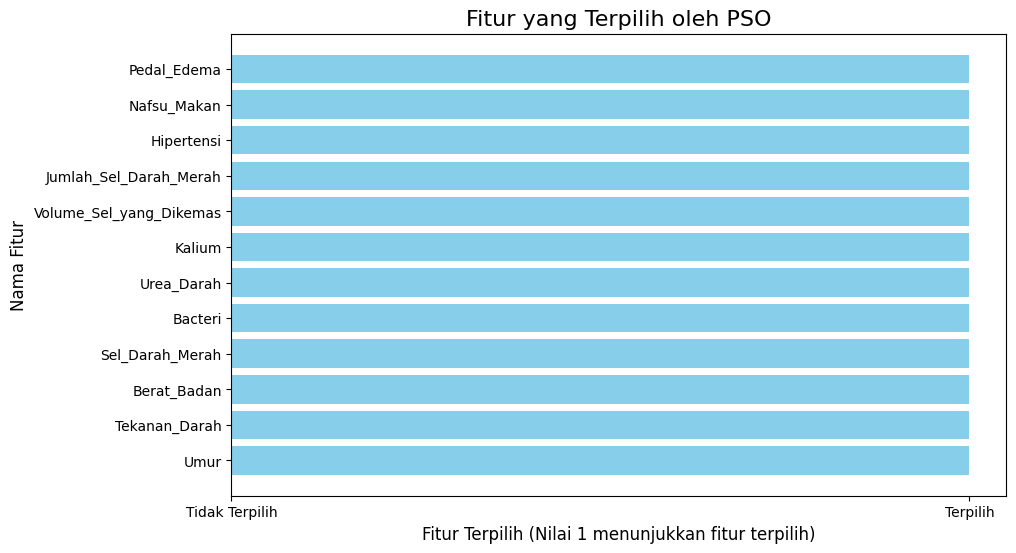

In [20]:
import matplotlib.pyplot as plt

# Membuat grafik untuk menampilkan fitur yang terpilih
selected_features_indices = np.where(selected_features == True)[0]  # Indeks fitur yang terpilih

# Membuat list fitur terpilih berdasarkan nama fitur
selected_feature_names = fitur[selected_features]

# Menampilkan grafik
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names, np.ones_like(selected_feature_names), color='skyblue')  # Bar untuk fitur terpilih
plt.title("Fitur yang Terpilih oleh PSO", fontsize=16)
plt.xlabel("Fitur Terpilih (Nilai 1 menunjukkan fitur terpilih)", fontsize=12)
plt.ylabel("Nama Fitur", fontsize=12)
plt.xticks([0, 1], ['Tidak Terpilih', 'Terpilih'])
plt.show()


pso



### **Tahapan Pengujian Parameter:**
1. **Pengujian Jumlah Iterasi:**
   - Penelitian menguji berbagai jumlah iterasi (5, 10, hingga 50 iterasi) untuk mencari jumlah iterasi terbaik.
   - Jumlah partikel (25), bobot inersia (0,9), dan koefisien akselerasi \( c_1 = 1 \), \( c_2 = 1,2 \) sudah ditentukan terlebih dahulu.
   - Iterasi terbaik dipilih berdasarkan rata-rata akurasi dari pengujian 10-fold cross-validation.

2. **Pengujian Jumlah Partikel:**
   - Setelah iterasi terbaik ditemukan (contoh: 40 iterasi), jumlah partikel diuji (5, 10, hingga 50 partikel) untuk menentukan jumlah partikel optimal.
   - Parameter lainnya seperti iterasi terbaik, bobot inersia, \( c_1 \), dan \( c_2 \) tetap digunakan.
   - Jumlah partikel terbaik dipilih berdasarkan rata-rata akurasi 10-fold cross-validation.

3. **Pengujian Bobot Inersia:**
   - Setelah iterasi dan jumlah partikel terbaik ditemukan (contoh: 40 iterasi, 25 partikel), bobot inersia diuji dari 0,1 hingga 1,0.
   - Parameter \( c_1 \), \( c_2 \), iterasi, dan partikel terbaik digunakan dalam pengujian ini.
   - Bobot inersia terbaik dipilih berdasarkan rata-rata akurasi 10-fold cross-validation.

4. **Pengujian Koefisien Akselerasi (\( c_1 \) dan \( c_2 \)):**
   - Setelah parameter iterasi, partikel, dan bobot inersia terbaik ditemukan, pengujian dilakukan pada kombinasi nilai \( c_1 \) dan \( c_2 \) di rentang 0,1 hingga 2,0.
   - Nilai parameter lainnya tetap menggunakan nilai terbaik yang ditemukan sebelumnya.
   - Kombinasi \( c_1 \) dan \( c_2 \) terbaik dipilih berdasarkan rata-rata akurasi 10-fold cross-validation.

---

### **Tahapan Seleksi Fitur:**
Setelah parameter terbaik ditemukan (jumlah iterasi, jumlah partikel, bobot inersia, \( c_1 \), dan \( c_2 \)), barulah BPSO digunakan untuk **seleksi fitur**. Fitur yang dipilih adalah fitur optimal berdasarkan posisi partikel terbaik dari BPSO dengan parameter terbaik.

Kemudian dilakukan **evaluasi akhir** terhadap:
- Kinerja algoritma tanpa seleksi fitur.
- Kinerja algoritma setelah seleksi fitur menggunakan parameter terbaik.

---

### **Kesimpulan:**
Narasi ini mengindikasikan bahwa langkah **mencari parameter terbaik dilakukan terlebih dahulu secara bertahap** sebelum masuk ke proses seleksi fitur. Setiap tahap menggunakan metode 10-fold cross-validation untuk mengevaluasi kinerja parameter. Setelah parameter optimal ditemukan, barulah BPSO digunakan untuk menentukan subset fitur yang optimal, diikuti dengan evaluasi kinerjanya terhadap algoritma klasifikasi (C4.5).

hasilnya

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

# Asumsi: X dan y sudah tersedia
# Fitur yang terpilih berdasarkan mask PSO (True = terpilih, False = tidak terpilih)
selected_features = np.array([True, True, True, False, False, True, False, False, True, False, True, False, False, True, False, True, False, True, True, False, False, True, True, False])
X_selected = X[:, selected_features]  # Memilih fitur yang hanya bernilai True

# Inisialisasi K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=5)
fold_accuracies = []
fold_f1_scores = []
fold_recalls = []
fold_precisions = []

# Loop untuk setiap fold
for train_index, test_index in kf.split(X_selected):
    # Membagi data berdasarkan indeks fold
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Membuat model Decision Tree
    dtc_pso = DecisionTreeClassifier(max_depth= 10, random_state=5)
    dtc_pso.fit(X_train, y_train)
    
    # Evaluasi model pada fold ini
    pso_predictions = dtc_pso.predict(X_test)
    
    # Menghitung metrik
    accuracy = accuracy_score(y_test, pso_predictions)
    f1 = f1_score(y_test, pso_predictions, average='weighted')
    recall = recall_score(y_test, pso_predictions, average='weighted')
    precision = precision_score(y_test, pso_predictions, average='weighted')
    
    # Menyimpan hasil metrik untuk setiap fold
    fold_accuracies.append(accuracy)
    fold_f1_scores.append(f1)
    fold_recalls.append(recall)
    fold_precisions.append(precision)

# Menghitung rata-rata metrik
avg_accuracy = np.mean(fold_accuracies) * 100  # Mengonversi ke persentase
avg_f1 = np.mean(fold_f1_scores)
avg_recall = np.mean(fold_recalls)
avg_precision = np.mean(fold_precisions)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi dengan Fitur Terpilih oleh PSO:")
print(f"Average Accuracy: {avg_accuracy:.2f}%")
print(f"Average F1 Score: {avg_f1:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f}")



Hasil Evaluasi dengan Fitur Terpilih oleh PSO:
Average Accuracy: 96.75%
Average F1 Score: 0.97
Average Recall: 0.97
Average Precision: 0.97


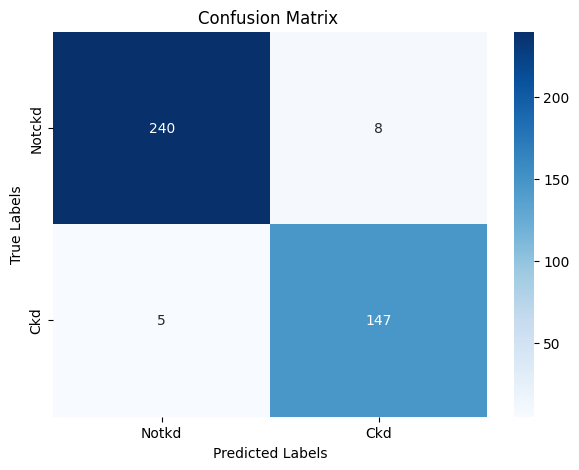

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have run the model and obtained predictions as mentioned in your code
# Create confusion matrix for each fold
conf_matrix = np.zeros((2, 2))  # Initialize an empty confusion matrix (2x2 for binary classification)

# Loop through each fold to accumulate confusion matrices
for train_index, test_index in kf.split(X_selected):
    # Split data based on the fold index
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the decision tree classifier
    dtc_pso = DecisionTreeClassifier(max_depth=10, random_state=5)
    dtc_pso.fit(X_train, y_train)
    
    # Predict the values
    predictions = dtc_pso.predict(X_test)
    
    # Compute confusion matrix for each fold and add it to the cumulative matrix
    fold_conf_matrix = confusion_matrix(y_test, predictions)
    conf_matrix += fold_conf_matrix

# Plot cumulative confusion matrix across all folds
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Notkd', 'Ckd'], yticklabels=['Notckd', 'Ckd'])
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


analisis perbandingan setelah dan sebelum pemilihan fitur

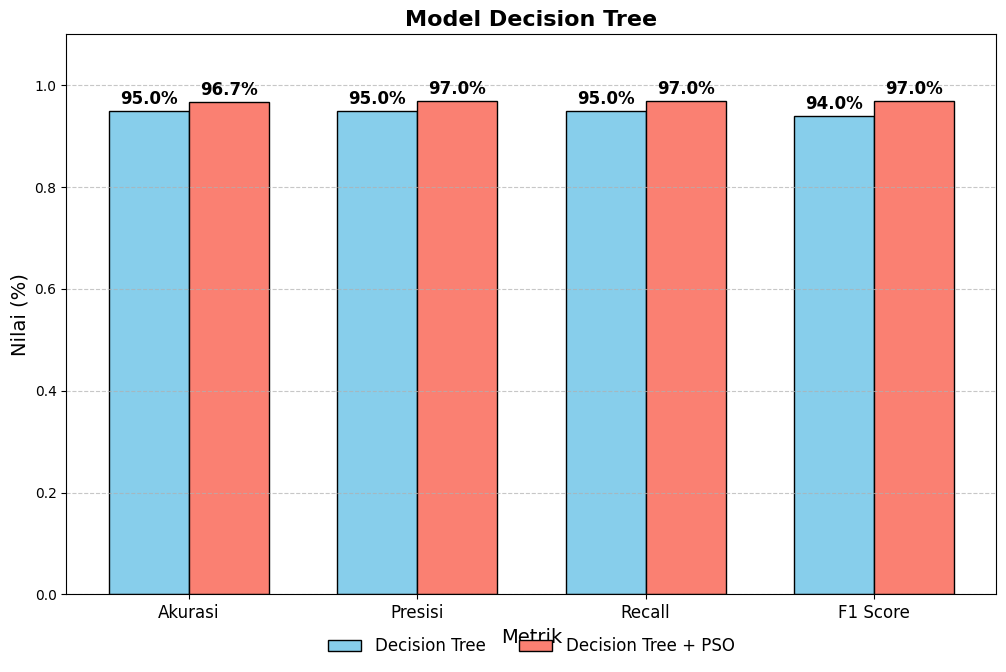

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data metrik untuk kedua model
categories = ["Akurasi", "Presisi", "Recall", "F1 Score"]
decision_tree = [0.95, 0.95, 0.95, 0.94]
decision_tree_pso = [0.967, 0.97, 0.97, 0.97]

# Menentukan posisi untuk setiap kategori
x = np.arange(len(categories))
width = 0.35

# Membuat grafik batang
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, decision_tree, width, label="Decision Tree", color='skyblue', edgecolor='black')
bar2 = ax.bar(x + width/2, decision_tree_pso, width, label="Decision Tree + PSO", color='salmon', edgecolor='black')

# Menambahkan detail pada grafik
ax.set_xlabel("Metrik", fontsize=14)
ax.set_ylabel("Nilai (%)", fontsize=14)
ax.set_title("Model Decision Tree", fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Memindahkan legenda ke luar grafik
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

# Menambahkan garis grid horizontal
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas setiap batang
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.1%}', 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

add_value_labels(bar1)
add_value_labels(bar2)

# Menyesuaikan margin agar tidak terlalu rapat
ax.set_ylim(0, 1.1)  # Menambah ruang di atas batang
plt.subplots_adjust(top=0.85, bottom=0.15)  # Memberikan lebih banyak ruang di bawah grafik untuk legenda

plt.show()


*KLASIFIKASI DECISION TREE DENGAN CRITERION ENTROPY*

In [24]:
dtc_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
dtc_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
dtc_pred_en = dtc_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, dtc_pred_en)))

Model accuracy score with criterion entropy: 0.9750


In [26]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, dtc_pred_en)))

Model accuracy score with criterion entropy: 0.9750


In [27]:
dtc_pred_train_en = dtc_en.predict(X_train)
dtc_pred_train_en

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, dtc_pred_train_en)))

Training-set accuracy score: 0.9444


In [29]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(dtc_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dtc_en.score(X_test, y_test)))

Training set score: 0.9444
Test set score: 0.9750


[Text(0.5769230769230769, 0.875, 'x[2] <= 1.019\nentropy = 0.971\nsamples = 360\nvalue = [216, 144]'),
 Text(0.3076923076923077, 0.625, 'x[7] <= 30.5\nentropy = 0.235\nsamples = 182\nvalue = [175, 7]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 64.5\nentropy = 0.093\nsamples = 168\nvalue = [166, 2]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.219\nsamples = 57\nvalue = [55, 2]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 1.016\nentropy = 0.94\nsamples = 14\nvalue = [9, 5]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.8461538461538461, 0.625, 'x[9] <= 0.5\nentropy = 0.779\nsamples = 178\nvalue = [41, 137]'),
 Text(0.7692307692307693, 0.375, 'x[7] <= 30.5\nentropy = 0.501\nsamples = 154\nvalue = [17, 137]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.931\nsamples = 49\n

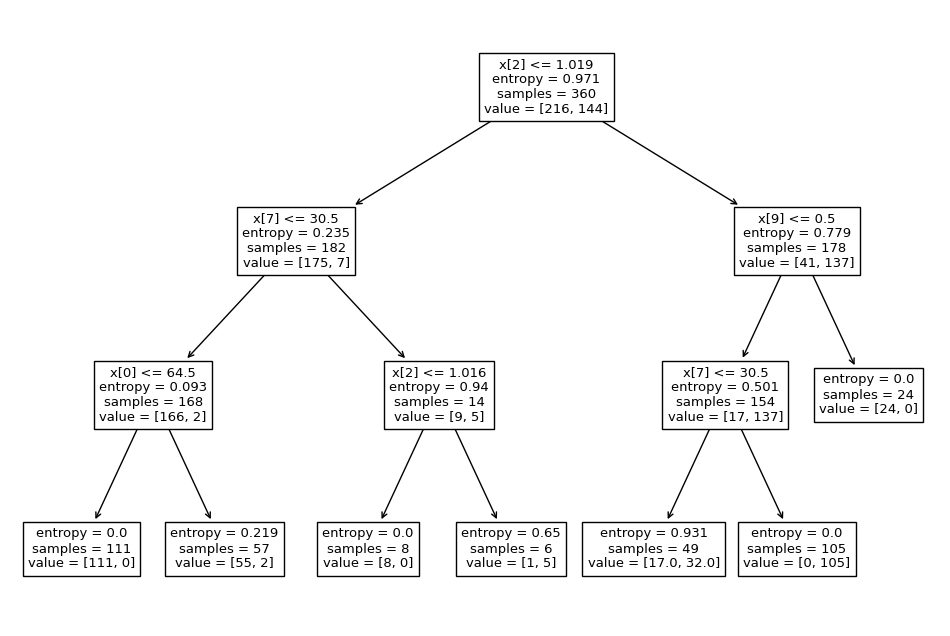

In [30]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dtc_en.fit(X_train, y_train)) 

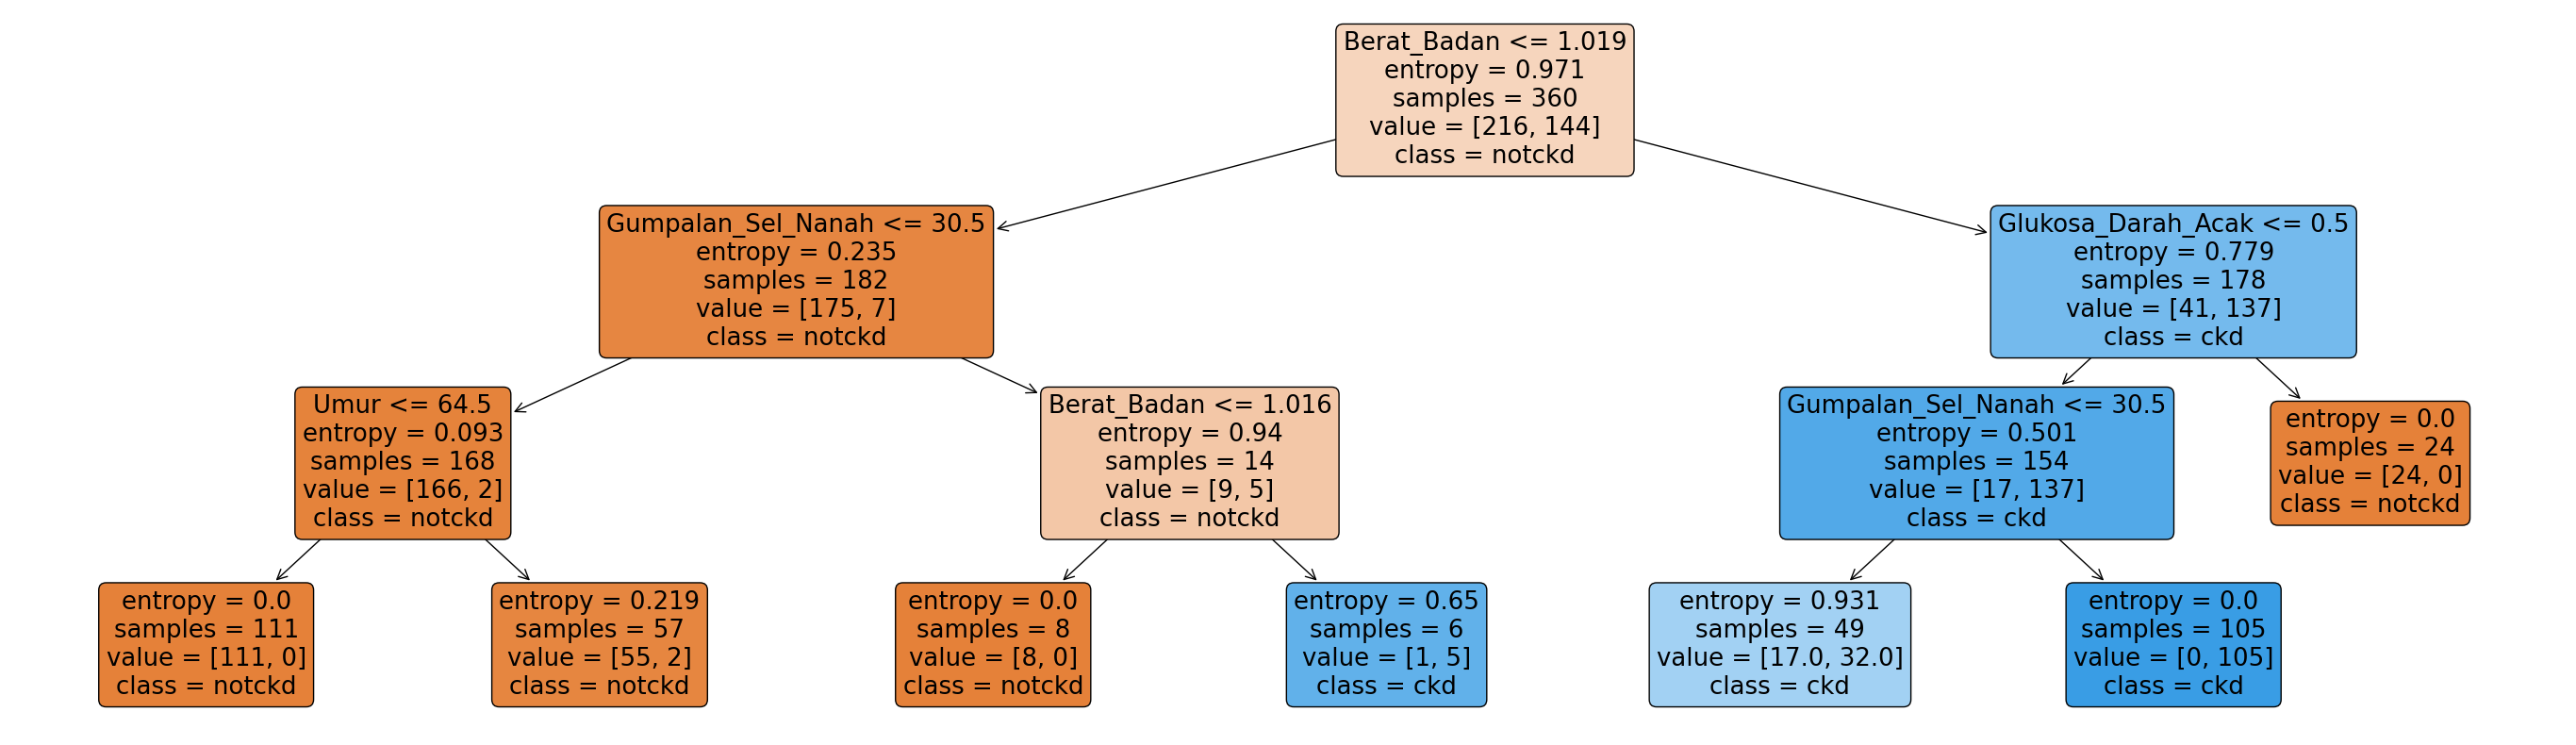

In [31]:

fig = plt.figure(figsize=(35, 10))
_ = tree.plot_tree(dtc_en,
                   feature_names=ind_col,
                   class_names=['notckd', 'ckd'],
                   filled=True, rounded=True)

In [32]:
import pickle

In [33]:
# Simpan model ke file .pkl
with open('decision_tree_pso.pkl', 'wb') as file:
    pickle.dump(dtc_pso, file)

print("Model Decision Tree berhasil disimpan sebagai decision_tree_aja.pkl")

Model Decision Tree berhasil disimpan sebagai decision_tree_aja.pkl


In [34]:
# Muat model dari file .pkl
with open('decision_tree_pso.pkl', 'rb') as file:
    loaded_dt_model = pickle.load(file)

# Gunakan model untuk prediksi
predictions = loaded_dt_model.predict(X_test)
print("Prediksi:", predictions)

Prediksi: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1]
